In [2]:
import numpy as np
import pandas as pd 
import itertools
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM,Dense,Dropout,GRU,Conv1D,InputLayer
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

### Get the data

In [3]:
dfRaw = pd.read_csv('bitcoin.csv')
dfRaw.sort_values(by='time_period_start',inplace=True)
dfRaw = dfRaw[dfRaw.columns[4:]]
df = dfRaw.values

### Create the data sets

In [4]:
tempX= []
tempY = []
for i in range(60,len(df)):
    tempX.append(list(df[i-60:i,:].reshape(1,-1).squeeze()))
    tempY.append(df[i][1])

### Normalize the Data using MinMaxScaler

In [6]:
scX = MinMaxScaler(feature_range = (0, 1))
scY = MinMaxScaler(feature_range = (0, 1))

transformedX = scX.fit_transform(tempX) 
transformedY = scY.fit_transform(np.array(tempY).reshape(-1,1))
transformedX = transformedX.reshape(transformedX.shape[0], transformedX.shape[1], 1)

### Create train and test sets

In [7]:
cut = int(.95*len(df))
X_train = transformedX[:cut]
X_test = transformedX[cut:]
y_train = transformedY[:cut]
y_test = transformedY[cut:]

### Train LTSM Model

In [8]:
modelLTSM = Sequential()
modelLTSM.add(LSTM(units=75, return_sequences=True, input_shape=(X_train.shape[1], 1),dropout=.25))
modelLTSM.add(LSTM(units=75,dropout=.25))
modelLTSM.add(Dense(units=1))
modelLTSM.compile(optimizer='adam',loss='mean_squared_error')
modelLTSM.fit(X_train, y_train, epochs=12, batch_size=50)

Epoch 1/12
190/190 [==============================] - 80s 412ms/step - loss: 0.0165
Epoch 2/12
190/190 [==============================] - 97s 509ms/step - loss: 0.0028
Epoch 3/12
190/190 [==============================] - 98s 516ms/step - loss: 0.0024
Epoch 4/12
190/190 [==============================] - 100s 524ms/step - loss: 0.0019
Epoch 5/12
190/190 [==============================] - 102s 536ms/step - loss: 0.0016
Epoch 6/12
190/190 [==============================] - 106s 559ms/step - loss: 0.0015
Epoch 7/12
190/190 [==============================] - 106s 559ms/step - loss: 0.0015
Epoch 8/12
190/190 [==============================] - 110s 580ms/step - loss: 0.0015
Epoch 9/12
190/190 [==============================] - 110s 581ms/step - loss: 0.0016
Epoch 10/12
190/190 [==============================] - 109s 575ms/step - loss: 0.0016
Epoch 11/12
190/190 [==============================] - 111s 582ms/step - loss: 0.0016
Epoch 12/12
190/190 [==============================] - 110s 577ms/

### Create GRU Model

In [9]:
modelGRU = Sequential()
modelGRU.add(GRU(units=75, return_sequences=True, input_shape=(X_train.shape[1], 1),dropout=.25))
modelGRU.add(GRU(units=75,dropout=.25))
modelGRU.add(Dense(units=1))
modelGRU.compile(optimizer='adam',loss='mean_squared_error')
modelGRU.fit(X_train, y_train, epochs=12, batch_size=32)

Epoch 1/12
297/297 [==============================] - 167s 553ms/step - loss: 0.0147
Epoch 2/12
297/297 [==============================] - 164s 552ms/step - loss: 0.0020
Epoch 3/12
297/297 [==============================] - 164s 552ms/step - loss: 0.0013
Epoch 4/12
297/297 [==============================] - 165s 556ms/step - loss: 0.0011
Epoch 5/12
297/297 [==============================] - 165s 556ms/step - loss: 0.0010
Epoch 6/12
297/297 [==============================] - 166s 561ms/step - loss: 0.0010
Epoch 7/12
297/297 [==============================] - 166s 560ms/step - loss: 9.2286e-04
Epoch 8/12
297/297 [==============================] - 168s 567ms/step - loss: 8.4446e-04
Epoch 9/12
297/297 [==============================] - 167s 561ms/step - loss: 8.6579e-04
Epoch 10/12
297/297 [==============================] - 164s 552ms/step - loss: 8.0226e-04
Epoch 11/12
297/297 [==============================] - 164s 553ms/step - loss: 7.8351e-04
Epoch 12/12
297/297 [======================

### Get Predictions and reverse the normalization

In [10]:
predictedLTSM = list(scY.inverse_transform(modelLTSM.predict(X_test)).reshape(1,-1).squeeze())
predictedGRU = list(scY.inverse_transform(modelGRU.predict(X_test)).reshape(1,-1).squeeze())
prices = list(scY.inverse_transform(y_test).reshape(1,-1).squeeze())

predictedPricesLTSM = list(scY.inverse_transform(modelLTSM.predict(X_train)).reshape(1,-1).squeeze()) + predictedLTSM 
predictedPricesGRU = list(scY.inverse_transform(modelGRU.predict(X_train)).reshape(1,-1).squeeze()) + predictedGRU
actualPrices = dfRaw['price_high'].values[61:]

In [174]:
def plot(actualPrice, predictedPrice,title):
    plt.figure(figsize=(10,5))
    plt.plot(actualPrice, color = 'blue', label = 'Actual')
    plt.plot(predictedPrice, color = 'red', label = 'Predicted')
    plt.title(title)
    plt.xlabel('Seconds')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

### Graphing the predictions from both models

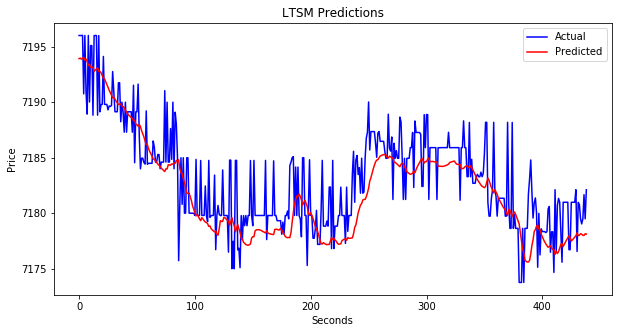

In [175]:
plot(prices, predictedLTSM,'LTSM Predictions')

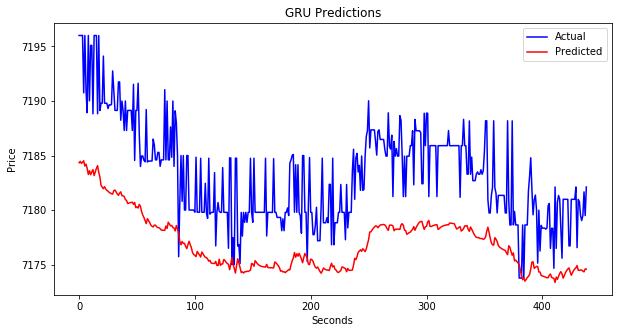

In [176]:
plot(prices, predictedGRU,'GRU Predictions')

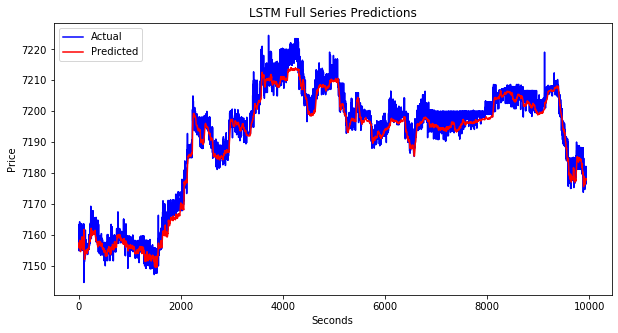

In [177]:
plot(actualPrices, predictedPricesLTSM ,'LSTM Full Series Predictions')

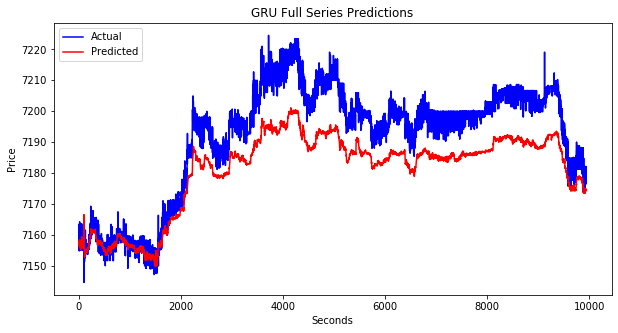

In [178]:
plot(actualPrices, predictedPricesGRU,'GRU Full Series Predictions')